# Projet numérique : Choix du pas de temps

###### Auteurs : Mathis Boutrouelle et Valentin Fenoux

#### Imports

In [5]:
import numpy as np
import matplotlib.pyplot as plt

Tlim = 10 ; Tau = 1

## Pas fixe

Nous commençons par définir la fonction qui permet de résoudre l'équation différentielle grâce au schéma d'Euler explicite. Dans la fonction nous introduisons une constante $T_{lim} $ qui est la durée sur laquelle nous voulons faire la simulation, ainsi qu'une constante $\tau$ qui est la constante de temps de l'équation différentielle choisi (cf plus bas).

In [23]:
def solver_euler_explicite(f,x0,dt) :
    vect_x = [x0]   # Vecteur de la solution
    x = x0
    vect_t = [0]    # Vecteur des temps
    n = int(Tlim//dt)    # n : nombre de points sur l'intervalle de temps pour un dt donné
    for i in range(1,n) :
        x = vect_x[i-1] + i*dt*f(vect_x[i-1])   # Application du schéma d'Euler
        vect_x.append(x)
        vect_t.append(i*dt)
    return(vect_t, vect_x)

Nous allons tester les performances de notre solveur sur l'équation : $$ \overset{.}{x} = \frac{1 - x}{\tau} $$ qui se résoud explicitement sous la forme : $ x(t) = 1 - e^{\frac{-t}{\tau}} $

On commence d'abord par créer les vecteurs de la solution littérale.

In [24]:
t_lit = np.arange(0, Tlim, 0.01)   # On crée un vecteur des temps avec le pas de temps choisi
x_lit = []
for t in t_lit :
    x = 1 - np.exp(-t/Tau)
    x_lit.append(x)
    

On peut alors chercher la solution avec le solveur numérique, en sachant que $x_0 = 0$.

In [25]:
def f(x) :
    return((1 - x)/Tau)

t_num,x_num = solver_euler_explicite(f,0,0.01)

### Affichage des résultats

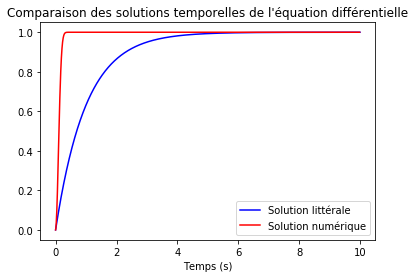

In [26]:
plt.plot(t_lit, x_lit, 'b', label="Solution littérale")
plt.plot(t_num, x_num, 'r', label="Solution numérique")
plt.legend()
plt.xlabel('Temps (s)')
plt.title("Comparaison des solutions temporelles de l'équation différentielle")
plt.show()

### Convergence du schéma